In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

dataset_path = r'C:\Users\aniru\OneDrive\Desktop\ML_Alina\Assignment_2\dhirajsu_amhaske2_assignment2_final\dhirajsu_amhaske2_assignment2_final\datasets\cnn_dataset\cnn_dataset'

In [2]:
from torch.utils.data import random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [3]:
for images, labels in train_loader:
    
    print(images.shape, labels)
    break

torch.Size([32, 1, 224, 224]) tensor([14,  5, 22, 11, 19,  2, 20,  8,  4, 26, 10,  8, 18, 18,  9, 17, 21,  7,
        12,  8,  9,  6, 19, 14, 18, 26, 14, 23,  4,  0, 18, 16])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class model_vgg(nn.Module):
    def __init__(self):
        super(model_vgg, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True), 
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.vgg_class = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 36),
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), -1)
        x = self.vgg_class(x)
        return x

model = model_vgg()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model.to(device)

model_vgg(
  (layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1

In [5]:
import time
# from torch.optim import lr_scheduler

start_time = time.time()

loss_fun = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

train_loss = []
val_loss = []
test_loss = []
train_acc = []
val_acc= []
test_acc = []

for epoch in range(4):
    model.train()
    running_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0

    for images, labels in  train_loader:
        images, labels = images.to(device), labels.to(device)

        cnt += 1
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fun(outputs, labels)
        loss.backward()
        optimizer.step()
        if cnt % 100 == 0:
            print(cnt, loss)

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        # predicted = outputs.argmax(dim=1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss.append(running_loss / len(train_loader))
    train_acc.append(100 * correct_train / total_train)

    model.eval()
    val_los = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            cnt += 1
            outputs = model(images)
            loss = loss_fun(outputs, labels)

            if cnt % 20 == 0:
                print(cnt, loss)
            val_los += loss.item()
            _, predicted = torch.max(outputs, 1)
            # predicted = outputs.argmax(dim=1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_loss.append(val_los / len(val_loader))
    val_acc.append(100 * correct_val / total_val)
    # scheduler.step(val_loss[-1])

    print(f"{epoch+1} : , Training Loss: {train_loss[-1]:.4f}, Validation Loss: {val_loss[-1]:.4f}, "
          f"Training Accuracy: {train_acc[-1]:.2f}%, Validation Accuracy: {val_acc[-1]:.2f}%")

100 tensor(3.3480, device='cuda:0', grad_fn=<NllLossBackward0>)
200 tensor(3.3356, device='cuda:0', grad_fn=<NllLossBackward0>)
300 tensor(3.2882, device='cuda:0', grad_fn=<NllLossBackward0>)
400 tensor(3.2777, device='cuda:0', grad_fn=<NllLossBackward0>)
500 tensor(3.3252, device='cuda:0', grad_fn=<NllLossBackward0>)
600 tensor(3.2399, device='cuda:0', grad_fn=<NllLossBackward0>)
700 tensor(3.2957, device='cuda:0', grad_fn=<NllLossBackward0>)
800 tensor(3.2921, device='cuda:0', grad_fn=<NllLossBackward0>)
900 tensor(3.2419, device='cuda:0', grad_fn=<NllLossBackward0>)
1000 tensor(3.3324, device='cuda:0', grad_fn=<NllLossBackward0>)
1100 tensor(3.3068, device='cuda:0', grad_fn=<NllLossBackward0>)
1200 tensor(3.3367, device='cuda:0', grad_fn=<NllLossBackward0>)
1300 tensor(3.2868, device='cuda:0', grad_fn=<NllLossBackward0>)
1400 tensor(3.2933, device='cuda:0', grad_fn=<NllLossBackward0>)
1500 tensor(1.8910, device='cuda:0', grad_fn=<NllLossBackward0>)
1600 tensor(0.6179, device='cuda:0

In [6]:
model.eval()
test_los = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
    
        outputs = model(images)
        loss = loss_fun(outputs, labels)
        test_los += loss.item()
        # _, predicted = torch.max(outputs, 1)
        predicted = outputs.argmax(dim=1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_loss.append(test_los / len(test_loader))
test_acc.append(100 * correct_test / total_test)

test_acc *= len(train_acc)
test_loss *= len(train_loss)

end_time = time.time()
print(f"Test Loss: {test_loss[0]:.4f}")
print(f"Accuracy for test dataset: {test_acc[0]:.2f}%")

Test Loss: 0.2259
Accuracy for test dataset: 90.90%


In [12]:
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

model.eval()
test_loss, corr_pred_test, trained_samples_test = 0, 0, 0
pred, label = [], []

total_test_loss = []
test_acc = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fun(outputs, labels)
        test_loss += loss.item()
        
        _, preds = torch.max(outputs, 1)
        corr_pred_test += (preds == labels).sum().item()
        trained_samples_test += labels.size(0)
        
        pred.extend(preds.cpu().numpy())
        label.extend(labels.cpu().numpy())

total_test_loss.append(test_loss/len(test_loader))
test_acc.append(corr_pred_test / trained_samples_test)

print(f'Test Loss: {total_test_loss[0]:.4f}, Test Accuracy: {test_acc[0]*100:.4f}')

precision = precision_score(label, pred, average='weighted', zero_division=0)
recall = recall_score(label, pred, average='weighted', zero_division=0)
f1 = f1_score(label, pred, average='weighted', zero_division=0)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Loss: 0.2259, Test Accuracy: 90.9042
Test Precision: 0.9150
Test Recall: 0.9090
Test F1 Score: 0.9066


In [37]:
torch.save(model.state_dict(), 'dhirajsu_amhaske2_assignment2_part4.pth')

In [38]:
model.load_state_dict(torch.load('dhirajsu_amhaske2_assignment2_part4.pth'))

C:\Users\patil\AppData\Local\Temp\ipykernel_24156\729629413.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('dhirajsu_amhaske2_assignmen

<All keys matched successfully>

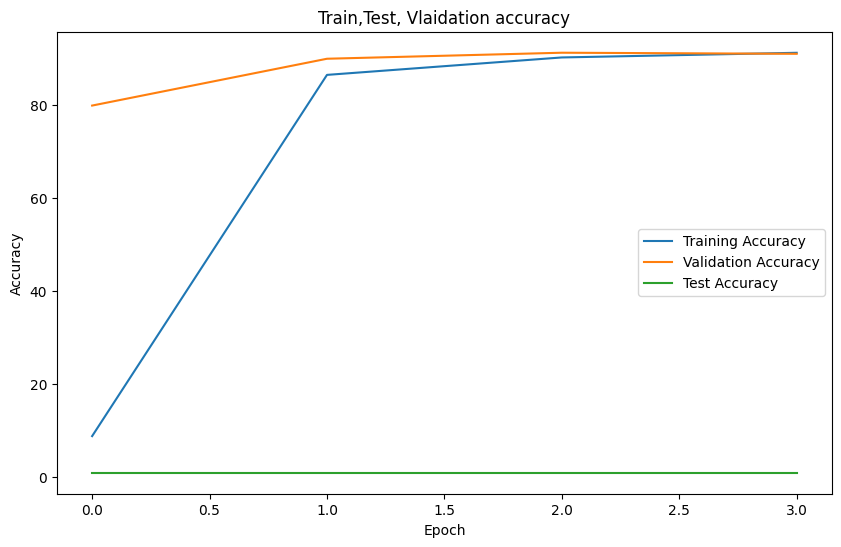

In [13]:
import matplotlib.pyplot as plt

test_acc_epochs = [test_acc[-1]] * len(train_acc)
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(test_acc_epochs, label='Test Accuracy')
plt.title("Train,Test, Vlaidation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

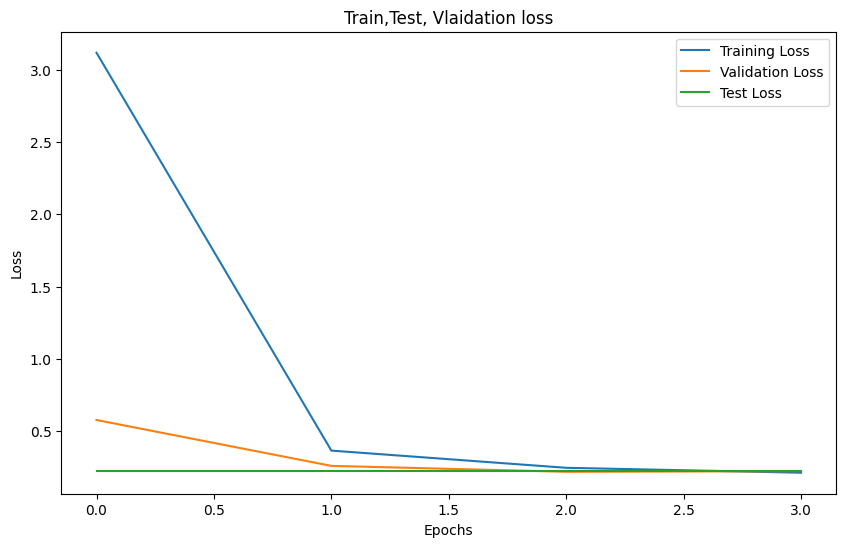

In [14]:
test_loss_epochs = [total_test_loss[-1]] * len(train_loss)

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.plot(test_loss_epochs, label="Test Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train,Test, Vlaidation loss")
plt.legend()
plt.show()

In [15]:
import seaborn as sns
import numpy as np

cm = confusion_matrix(label, pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=np.arange(36), yticklabels=np.arange(36))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

c:\Users\aniru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aniru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aniru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aniru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\aniru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1180: Undefined

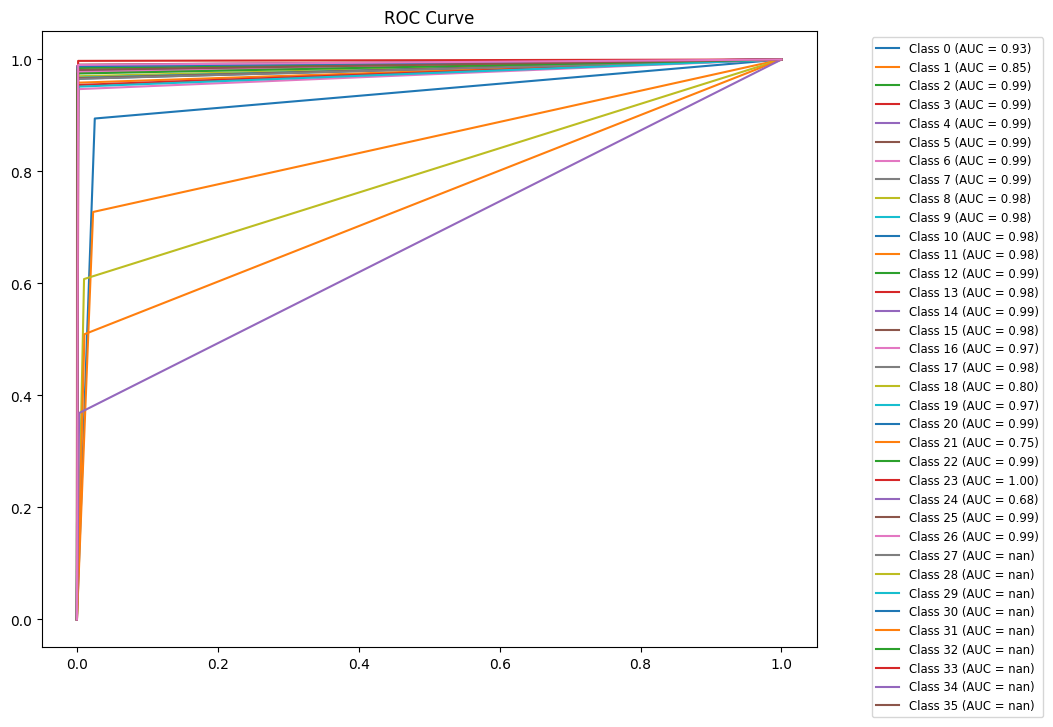

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

label_bin = label_binarize(label, classes=np.arange(36))
pred_bin = label_binarize(pred, classes=np.arange(36))

plt.figure(figsize=(10, 8))
for i in range(36):
    falsep, truep, _ = roc_curve(label_bin[:, i], pred_bin[:, i])
    plt.plot(falsep, truep, label=f'Class {i} (AUC = {auc(falsep, truep):.2f})')


plt.title('ROC Curve')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')
plt.show()

In [24]:
# model.save("cnn_model.h5")
import torch

# Save the entire model (weights + architecture)
# torch.save(model_vgg.state_dict(), "cnn_model_weights.pth")
torch.save(model.state_dict(), 'cnn_model_weights.pth')

torch.save(model, "cnn_model_full.pth")


